# Star Wars Survey

### Darren Ho

While waiting for [Star Wars: The Force Awakens](https://en.wikipedia.org/wiki/Star_Wars:_The_Force_Awakens) to come out, the team at [FiveThirtyEight](https://fivethirtyeight.com/) became interested in answering some questions about Star Wars fans. In particular, they wondered: **does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?**

The team collected data addressing this question by surveying *Star Wars* fans using the online tool SurveyMonkey. They gathered 835 total responses, which can be found on [GitHub](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey)

For this project, we'll clean and explore the dataset. 

In [1]:
# import library, and read in dataset

import pandas as pd

star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [2]:
# check first 10 row

star_wars.head(10)

RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
0    3292879998                                                Yes             
1    3292879538                                                 No             
2    3292765271                                                Yes             
3    3292763116                                                Yes             
4    3292731220                                                Yes             
5    3292719380                                                Yes             
6    3292684787                                                Yes             
7    3292663732                                                Yes             
8    3292654043                                                Yes             
9    3292640424                                                Yes             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0                                                Yes                      
1                                                NaN                      
2                                                 No                      
3                                                Yes                      
4                                                Yes                      
5                                                Yes                      
6                                                Yes                      
7                                                Yes                      
8                                                Yes                      
9                                                 No                      

  Which of the following Star Wars films have you seen? Please select all that apply.  \
0           Star Wars: Episode I  The Phantom Menace                                    
1                                                NaN                                    
2           Star Wars: Episode I  The Phantom Menace                                    
3           Star Wars: Episode I  The Phantom Menace                                    
4           Star Wars: Episode I  The Phantom Menace                                    
5           Star Wars: Episode I  The Phantom Menace                                    
6           Star Wars: Episode I  The Phantom Menace                                    
7           Star Wars: Episode I  The Phantom Menace                                    
8           Star Wars: Episode I  The Phantom Menace                                    
9                                                NaN                                    

                                    Unnamed: 4  \
0  Star Wars: Episode II  Attack of the Clones   
1                                          NaN   
2  Star Wars: Episode II  Attack of the Clones   
3  Star Wars: Episode II  Attack of the Clones   
4  Star Wars: Episode II  Attack of the Clones   
5  Star Wars: Episode II  Attack of the Clones   
6  Star Wars: Episode II  Attack of the Clones   
7  Star Wars: Episode II  Attack of the Clones   
8  Star Wars: Episode II  Attack of the Clones   
9  Star Wars: Episode II  Attack of the Clones   

                                    Unnamed: 5  \
0  Star Wars: Episode III  Revenge of the Sith   
1                                          NaN   
2  Star Wars: Episode III  Revenge of the Sith   
3  Star Wars: Episode III  Revenge of the Sith   
4  Star Wars: Episode III  Revenge of the Sith   
5  Star Wars: Episode III  Revenge of the Sith   
6  Star Wars: Episode III  Revenge of the Sith   
7  Star Wars: Episode III  Revenge of the Sith   
8  Star Wars: Episode III  Revenge of the Sith   
9                                          NaN   

                          Unnamed: 6  \
0  Star Wars: Episode IV  A New Hope   
1                                NaN   
2                                NaN   
3  Star Wars: Episode IV  A New Hope   
4  Star Wars: 

In [3]:
# checking all column names in dataset

star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

There are a lot of `Unnamed: #` columns in the dataset.

## Cleaning and Mapping Yes/No Columns

Taking a look at the next two columns:
- `Have you seen any of the 6 films in the Star Wars franchise?`
- `Do you consider yourself to be a fan of the Star Wars film franchise?`

Both columns represent `Yes/No` questions. They can also be `NaN` where a respondent chooses not to answer a question. Let's take a quick look at all the unique values in these two columns, along with the total number of times each value appears. 

In [4]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [5]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()

Yes    552
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

Both columns are currently string types, because the main values they contain are `Yes` and `No`. We can make the data a bit easier to analyze later by converting each column to a Boolean with only the values `True`, `False`, and `NaN`. Booleans are easier to work with because we can select the rows that are `True` or `False` without having to do a string comparison.

In [6]:
# dictionary to define a mapping from each value in a series to a new value

yes_no = {
    "Yes": True,
    "No": False
}

In [7]:
# mapping

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)


# checking column's new values
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [8]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()

True     552
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

## Cleaning and Mapping Checkbox Columns

The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question. `Which of the following Star Wars films have you seen? Please select all that apply.`

The columns for this question are:

- `Which of the following Star Wars films have you seen? Please select all that apply.` — whether or not the respondent saw `Star Wars: Episode I The Phantom Menace`

- `Unnamed: 4` — whether or not the respondent saw `Star Wars: Episode II Attack of the Clones`

- `Unnamed: 5` — whether or not the respondent saw `Star Wars: Episode III Revenge of the Sith`

- `Unnamed: 6` — whether or not the respondent saw `Star Wars: Episode IV A New Hope`

- `Unnamed: 7` — whether or not the respondent saw `Star Wars: Episode V The Empire Strikes Back`

- `Unnamed: 8` — whether or not the respondent saw `Star Wars: Episode VI Return of the Jedi`

For any of these columns, if the value in the cell is the name of the movie, that means the respondent saw the movie. However, if the value is `NaN`, the respondent either did not answer or did not see the movie. We'll assume they didn't see the movie. 

In [9]:
import numpy as np

# dictionary for map

sw_map = {
    
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}

# going thru columns rather than typing them out

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(sw_map)


In [10]:
# checking new values in columns

star_wars.iloc[:, 3:9]

Which of the following Star Wars films have you seen? Please select all that apply.  \
0                                                  True                                     
1                                                 False                                     
2                                                  True                                     
3                                                  True                                     
4                                                  True                                     
...                                                 ...                                     
1181                                               True                                     
1182                                               True                                     
1183                                              False                                     
1184                                               True                                     
1185                                               True                                     

      Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  
0           True        True        True        True        True  
1          False       False       False       False       False  
2           True        True       False       False       False  
3           True        True        True        True        True  
4           True        True        True        True        True  
...          ...         ...         ...         ...         ...  
1181        True        True        True        True        True  
1182        True        True        True        True        True  
1183       False       False       False       False       False  
1184        True        True        True        True        True  
1185        True       False       False        True        True  

[1186 rows x 6 columns]

In [11]:
# rename 

star_wars = star_wars.rename(columns={
    
        "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
        "Unnamed: 4": "seen_2",
        "Unnamed: 5": "seen_3",
        "Unnamed: 6": "seen_4",
        "Unnamed: 7": "seen_5",
        "Unnamed: 8": "seen_6"
        })

# checking new changes

star_wars.head()

RespondentID  Have you seen any of the 6 films in the Star Wars franchise?  \
0    3292879998                                               True              
1    3292879538                                              False              
2    3292765271                                               True              
3    3292763116                                               True              
4    3292731220                                               True              

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0                                               True                      
1                                                NaN                      
2                                              False                      
3                                               True                      
4                                               True                      

   seen_1  seen_2  seen_3  seen_4  seen_5  seen_6  \
0    True    True    True    True    True    True   
1   False   False   False   False   False   False   
2    True    True    True   False   False   False   
3    True    True    True    True    True    True   
4    True    True    True    True    True    True   

   Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.  \
0                                                3.0                                                                                               
1                                                NaN                                                                                               
2                                                1.0                                                                                               
3                                                5.0                                                                                               
4                                                5.0                                                                                               

   ...         Unnamed: 28       Which character shot first?  \
0  ...      Very favorably  I don't understand this question   
1  ...                 NaN                               NaN   
2  ...    Unfamiliar (N/A)  I don't understand this question   
3  ...      Very favorably  I don't understand this question   
4  ...  Somewhat favorably                            Greedo   

   Are you familiar with the Expanded Universe?  \
0                                           Yes   
1                                           NaN   
2                                            No   
3                                            No   
4                                           Yes   

   Do you consider yourself to be a fan of the Expanded Universe?  \
0                                                 No                
1                                                NaN                
2                                                NaN                
3                                                NaN                
4                                                 No                

   Do you consider yourself to be a fan of the Star Trek franchise? Gender  \
0                                                 No                  Male   
1                                                Yes                  Male   
2                                                 No                  Male   
3                                                Yes                  Male   
4                                                 No                  Male   

     Age     Household Income                         Education  \
0  18-29                  NaN                High school degree   
1  18-29         $0 - $24,999                   Bachelor degree   
2  18-29         $0 - $24,999                High school degree   
3  18-29  $10

We converted the columns to a Boolean once again, then renamed the columns to something a bit more intuitive. 

## Cleaning the Ranking Columns

The next six columns ask the respondent to rank the *Star Wars* movies in order from least to most favorite, with `1` being the most favorite and `6` being the least. Each of the following columns can contain the value `1`, `2`, `3`, `4`, `5`, `6` or `NaN`:

- `Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.` - How much the respondent liked `Star Wars: Episode I The Phantom Menace`

- `Unnamed: 10` — How much the respondent liked `Star Wars: Episode II Attack of the Clones`

- `Unnamed: 11` — How much the respondent liked `Star Wars: Episode III Revenge of the Sith`

- `Unnamed: 12` — How much the respondent liked `Star Wars: Episode IV A New Hope`

- `Unnamed: 13` — How much the respondent liked `Star Wars: Episode V The Empire Strikes Back`

- `Unnamed: 14` — How much the respondent liked `Star Wars: Episode VI Return of the Jedi`

In [12]:
# convert each of the columns above to a float type
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [13]:
# rename

star_wars = star_wars.rename(columns={
    
        "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
        "Unnamed: 10": "ranking_2",
        "Unnamed: 11": "ranking_3",
        "Unnamed: 12": "ranking_4",
        "Unnamed: 13": "ranking_5",
        "Unnamed: 14": "ranking_6"
        })

# checking changes

star_wars.head()

RespondentID  Have you seen any of the 6 films in the Star Wars franchise?  \
0    3292879998                                               True              
1    3292879538                                              False              
2    3292765271                                               True              
3    3292763116                                               True              
4    3292731220                                               True              

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0                                               True                      
1                                                NaN                      
2                                              False                      
3                                               True                      
4                                               True                      

   seen_1  seen_2  seen_3  seen_4  seen_5  seen_6  ranking_1  ...  \
0    True    True    True    True    True    True        3.0  ...   
1   False   False   False   False   False   False        NaN  ...   
2    True    True    True   False   False   False        1.0  ...   
3    True    True    True    True    True    True        5.0  ...   
4    True    True    True    True    True    True        5.0  ...   

          Unnamed: 28       Which character shot first?  \
0      Very favorably  I don't understand this question   
1                 NaN                               NaN   
2    Unfamiliar (N/A)  I don't understand this question   
3      Very favorably  I don't understand this question   
4  Somewhat favorably                            Greedo   

   Are you familiar with the Expanded Universe?  \
0                                           Yes   
1                                           NaN   
2                                            No   
3                                            No   
4                                           Yes   

   Do you consider yourself to be a fan of the Expanded Universe?  \
0                                                 No                
1                                                NaN                
2                                                NaN                
3                                                NaN                
4                                                 No                

   Do you consider yourself to be a fan of the Star Trek franchise? Gender  \
0                                                 No                  Male   
1                                                Yes                  Male   
2                                                 No                  Male   
3                                                Yes                  Male   
4                                                 No                  Male   

     Age     Household Income                         Education  \
0  18-29                  NaN                High school degree   
1  18-29         $0 - $24,999                   Bachelor degree   
2  18-29         $0 - $24,999                High school degree   
3  18-29  $100,000 - $149,999  Some college or Associate degree   
4  18-29  $100,000 - $149,999  Some college or Associate degree   

  Location (Census Region)  
0           South Atlantic  
1       West South Central  
2       West North Central  
3       West North Central  
4       West North Central  

[5 rows x 38 columns]

Fortunately, these columns do not require a whole lot of cleaning. We converted each column to a numeric type, then renamed the columns to make analysis easier. 

## Finding the Highest-Ranked Movie

With the ranking columns cleaned, we can find the highest-ranked movie quicker. To do this, we'll take the mean of each ranking column. REMEMBER: The lower the rank, the better (and vice-versa)

In [14]:
ranking_means = star_wars.iloc[:, 9:15].mean()
ranking_means

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

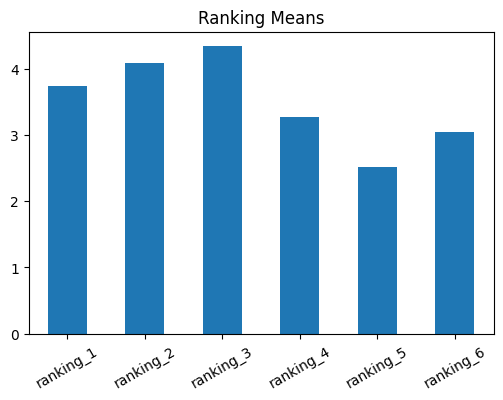

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

ranking_means.plot.bar(rot=30, title='Ranking Means')

Computing the mean of each `ranking` column and then plotting the findings in a bar chart, we see that `ranking_5` tends to be rated the highest of the original six movies. `ranking_5` corresponds to how much the respondents liked `Star Wars: Episode V Empire Strikes Back`. 

We can conclude that our findings fall in line with what the team at FiveThirtyEight wanted to answer, **does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?**

## Finding the Most Viewed Movie

Earlier in this project, we cleaned up the `seen` columns and converted their values to the Boolean type. We can figure out how many people have seen each movie just by taking the sum of the column because Booleans are treated like integers. 

In [16]:
# computing sum of each seen column

views = star_wars.iloc[:, 3:9].sum()
views

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

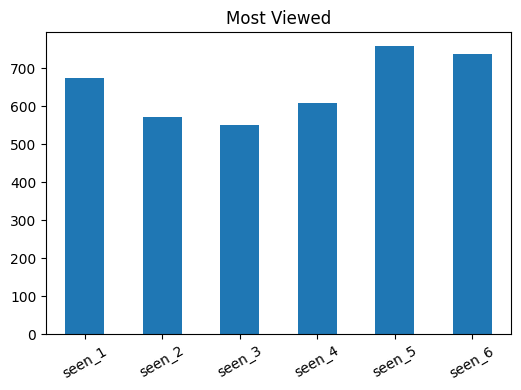

In [17]:
views.plot.bar(rot=30, title='Most Viewed')

According to the bar chart, `seen_5` is the most viewed of the Star Wars franchise. `seen_5` corresponds to `Star Wars: Episode V The Empire Strikes Back`. Just looking at this chart and the previous chart above, we see that the highest ranked movie:`Star Wars: Episode III Revenge of the Sith` is actually the least viewed, whereas the lowest ranked movie:`Star Wars: Episode V The Empire Strikes Back` is actually the most watched.   

## Exploring the Data by Binary Segments

We now know which movies the survey population as a whole has ranked the highest. Now let's examine how certain segments of the survey population responded. There are several columns that segment our data into two groups. Here are a few examples: 

- `Do you consider yourself to be a fan of the Star Wars film franchise?` — `True` or `False`
- `Do you consider yourself to be a fan of the Star Trek franchise?` — `Yes` or `No`
- `Gender` — `Male` or `Female`

We can split a dataframe into two groups based on a binary column by creating two subsets of that column. The subsets allow us to compute the most viewed movie, the highest-ranked movie, and other statistics separately for each group. 

In [18]:
# split the gender column

males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

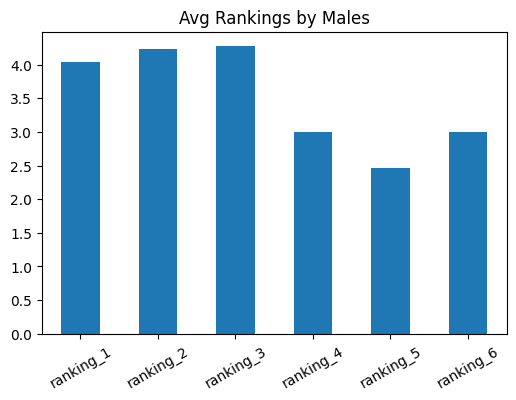

In [21]:
males.iloc[:, 9:15].mean().plot.bar(rot=30, title='Avg Rankings by Males')

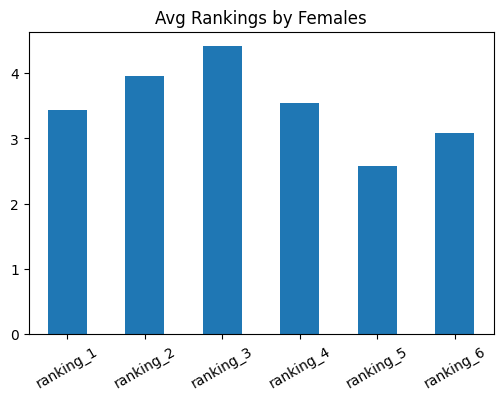

In [22]:
females.iloc[:, 9:15].mean().plot.bar(rot=30, title='Avg Rankings by Females')

We see that `Females` seemed to like the newer trilogy better than `Males` liked it. Both seemed to like the original trilogy the same. 

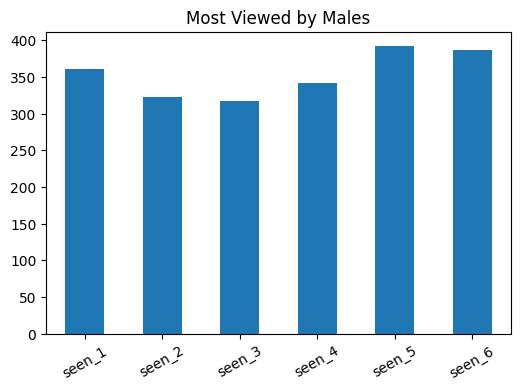

In [23]:
males.iloc[:, 3:9].sum().plot.bar(rot=30, title='Most Viewed by Males')

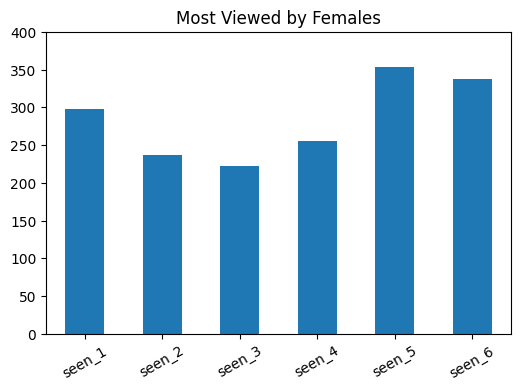

In [25]:
ax2 = females.iloc[:, 3:9].sum().plot.bar(rot=30, title='Most Viewed by Females')
ax2.set_ylim(0,400) # setting ylim to match above so easy to compare by eye
ax2

It appears that `Males` have watched the 6 movies more than the `Females` have. 

## Conclusion

Going back to what the FiveThirtyEight team wanted to answer, we found that the respondents agree that `Star Wars: Episode V- The Empire Strikes Back` is the best movie of the *Star Wars* franchise. We also found that the `Male` respondents have watched *Star Wars* the most compared to the `Female` respondents. The `Female` respondents liked the newer trilogy better than the `Male` respondents. 

## Next Steps

Some potential next steps:

- Try to segment the data based on columns like `Education`, `Location (Census Region)`, and `Which character shot first?`, which aren't binary. Are there any interesting patterns?

- Clean columns `15` and `29`, which contain data on the character respondents view favorably and unfavorably.

    - Which character do respondents like the most?
    - Which character do respondents dislike the most?
    - Which character is the most controversial (split between likes and dislikes)?